# Matplotlib, Seaborn

<br><a href="https://towardsdatascience.com/matplotlib-seaborn-pandas-an-ideal-amalgamation-for-statistical-data-visualisation-f619c8e8baa3"> Reference on Medium </a></br>
<br><a href="https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html">Data Scientist Handbook by Jake Vanderplas</a></br>

---
```
Date: 2021-07-28
```
---
```
Contents:
- Matplotlib objects 
- Matplotlib and Seaborn common functions
```

### Matplotlib

#### Matplotlib objects
<img src="matplotlib_object.PNG">matplot lib objects</img>

#### Axes common methods

---
```
Axes.set_xlabel()
Axes.set_ylabel()
```
---
```
Axes.set_title()
```
---
```
Axes.set_xlim()
Axes.set_ylim()
```
---
```
Axes.set_xticks()
Axes.set_yticks()
Axes.set_xticklabels()
Axes.set_yticklabels()
```
---
```
Axes.tick_params()
```


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# remove the warning returned from the libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
dates = [
    '1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04', '1981-01-05',
    '1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09', '1981-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

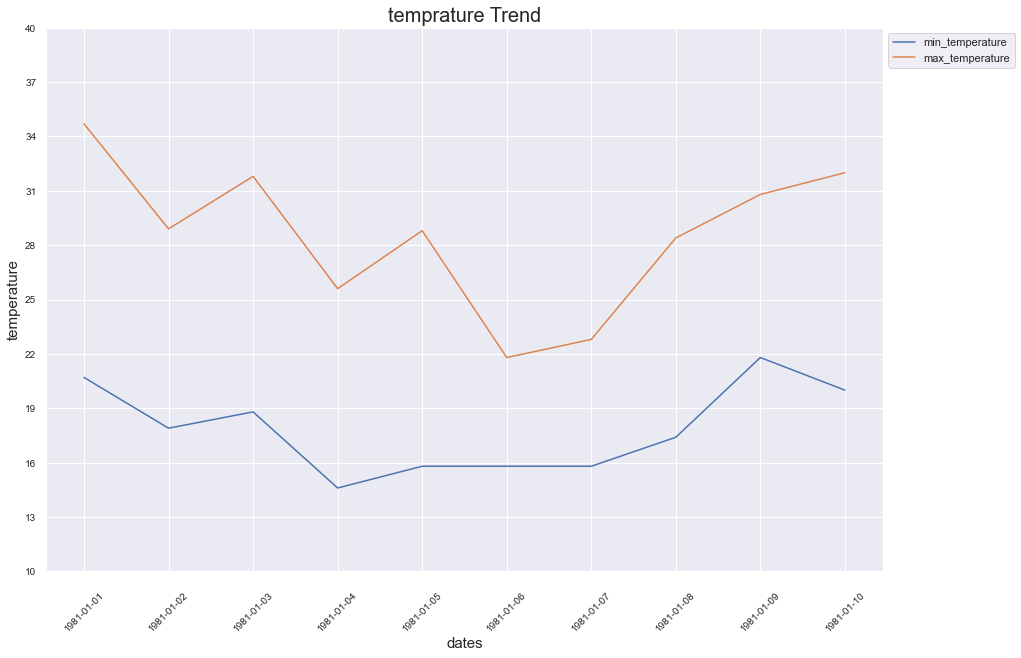

In [136]:
sns.set()
fontsize=20
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
axes.plot(dates, min_temperature, label="min_temperature") # adding on label will support legend()
axes.plot(dates, max_temperature, label="max_temperature")

axes.set_xlabel('dates', fontsize=15)
axes.set_ylabel('temperature', fontsize=15)
axes.set_title('temprature Trend', fontsize=fontsize)

axes.set_xticks(dates)
axes.set_xticklabels(dates)
axes.tick_params('x', labelsize=10, labelrotation=45, size=15)

axes.set_ylim(10,40)
axes.set_yticks(np.arange(10,41,3))
axes.tick_params('y', labelsize=10)

axes.legend(loc='upper left', bbox_to_anchor=(1,1));


### Seaborn - Axes level function

#### Axes level function - common seaborn charts using 

---
```
Relation Plots:
- scatterplot()
- lineplot()
```
---
```
categorical plots:
- striplot()
- swarmplot()
- boxplot()
- boxenplot()
- violinplot()
- countplot()
- pointplot()
- barplot()
```
---
```
Distribution plots:
- distplot()
- kdeplot()
- rugplot()
```
---
```
Regression plots:
- regplot()
- residplot()
```
---
```
Matrix plots:
- heatmap()
```
---


#### Axes level function - pass data 
```
- lists
- arrays
- pandas series
- pandas dataframe and/or names of columns
```

In [137]:
tips = sns.load_dataset('tips')

In [138]:
type(tips)

pandas.core.frame.DataFrame

In [139]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [140]:
total_bill = tips['total_bill'].values
tip = tips['tip'].values
type(total_bill)

numpy.ndarray

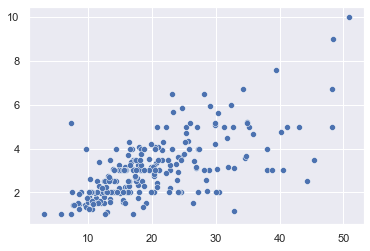

In [141]:
sns.scatterplot(total_bill, tip);

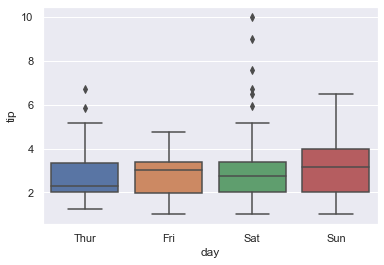

In [142]:
sns.boxplot(tips['day'], tips['tip']);

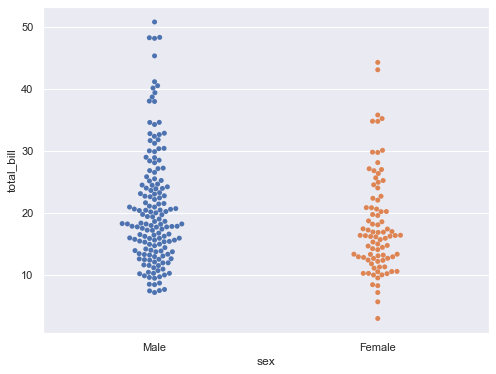

In [144]:
# figsize can be controled through initilizing fig and axes
fig, axes = plt.subplots(1,1, figsize=(8,6))
sns.swarmplot('sex', 'total_bill', data=tips);

#### array of axis (axes) - specify axes to be used to make a plot

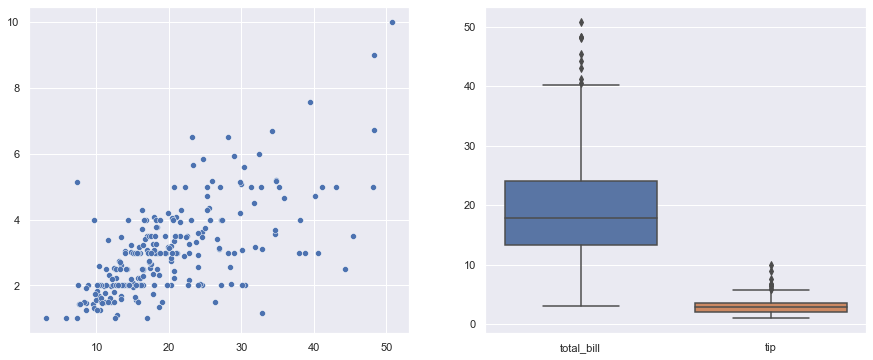

In [145]:
fig, axes = plt.subplots(nrows =1, ncols=2, figsize=(15,6))
sns.scatterplot(total_bill, tip, ax=axes[0])
sns.boxplot(data=tips[['total_bill', 'tip']], ax=axes[1]);

### Seaborn - figure level functions

#### FacetGrid - manually

```


In [146]:
# example of using rows and columns

# define which columns to chart
row_variable = 'day'
col_variable = 'smoker'
hue_variable = 'sex'

# find distinct values 
row_varialbes = tips[row_variable].unique()
col_variables = tips[col_variable].unique()

# distinct count of these unique values - used for indexing 
num_rows = row_varialbes.shape[0]
num_cols = col_variables.shape[0]

In [147]:
subset = tips.groupby([row_variable, col_variable])

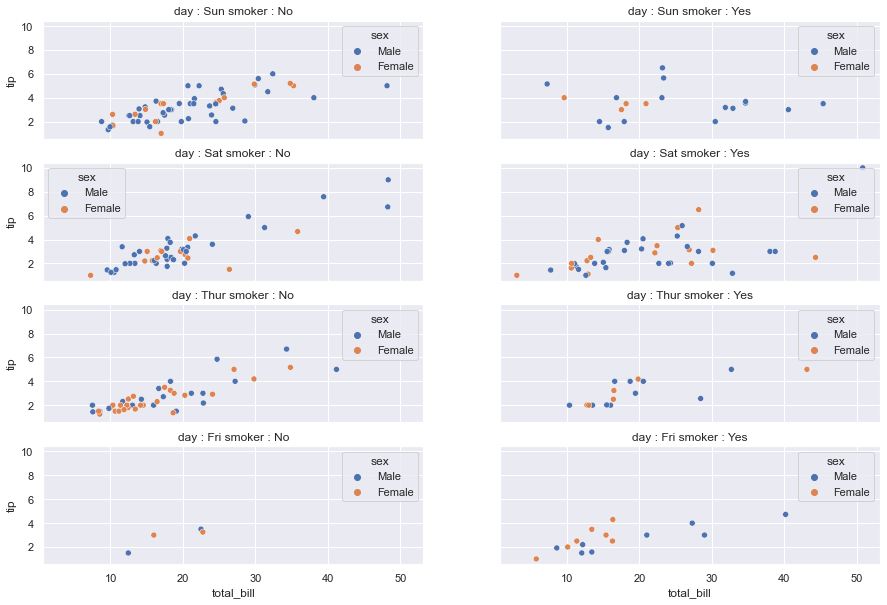

In [148]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,10), sharex=True, sharey=True)
for row in range(num_rows):
    for col in range(num_cols):
        ax = axes[row][col]
        row_id = row_varialbes[row]
        col_id = col_variables[col]
        ax_data = subset.get_group((row_id, col_id))
        sns.scatterplot(x='total_bill', y='tip', data=ax_data, hue = hue_variable, ax = ax)
        title = row_variable + " : " + row_id + ' ' + col_variable + ' : ' + col_id
        ax.set_title(title)

#### FacetGrid - seaborn

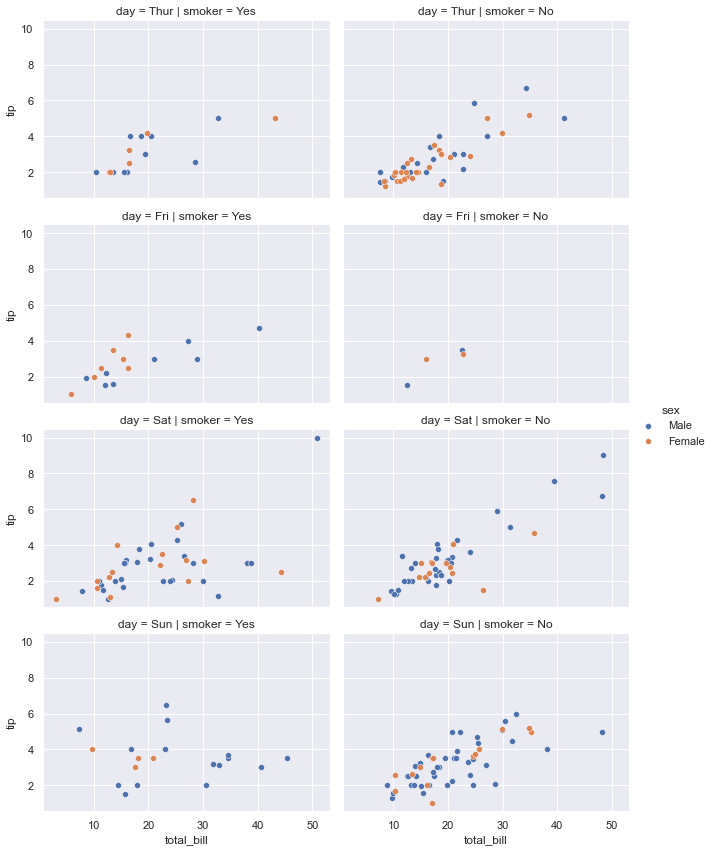

In [149]:
# The sns FacetGrid can do the same as above
facet_grid = sns.FacetGrid(row = 'day', col = 'smoker', hue = 'sex', data=tips, height = 3, aspect = 1.5)
facet_grid.map (sns.scatterplot, 'total_bill', 'tip')
facet_grid.add_legend();

#### FacetGrid and FacetGrid.map()

##### Three figure level functions

---
```
relplot():

- FacetGrid() + lineplot()
- FacetGrid() + scatterplot()
```
---
```
catplot():
- FacetGrid() + stripplot()
- FacetGrid() + swarmplot()
- FacetGrid() + boxplot()
- FacetGrid() + boxenplot()
- FacetGrid() + violinplot()
- FacetGrid() + pointplot()
- FacetGrid() + barplot()
- FacetGrid() + countplot()
```
---
```
lmplot():
- FacetGrid() + regplot()
```
---

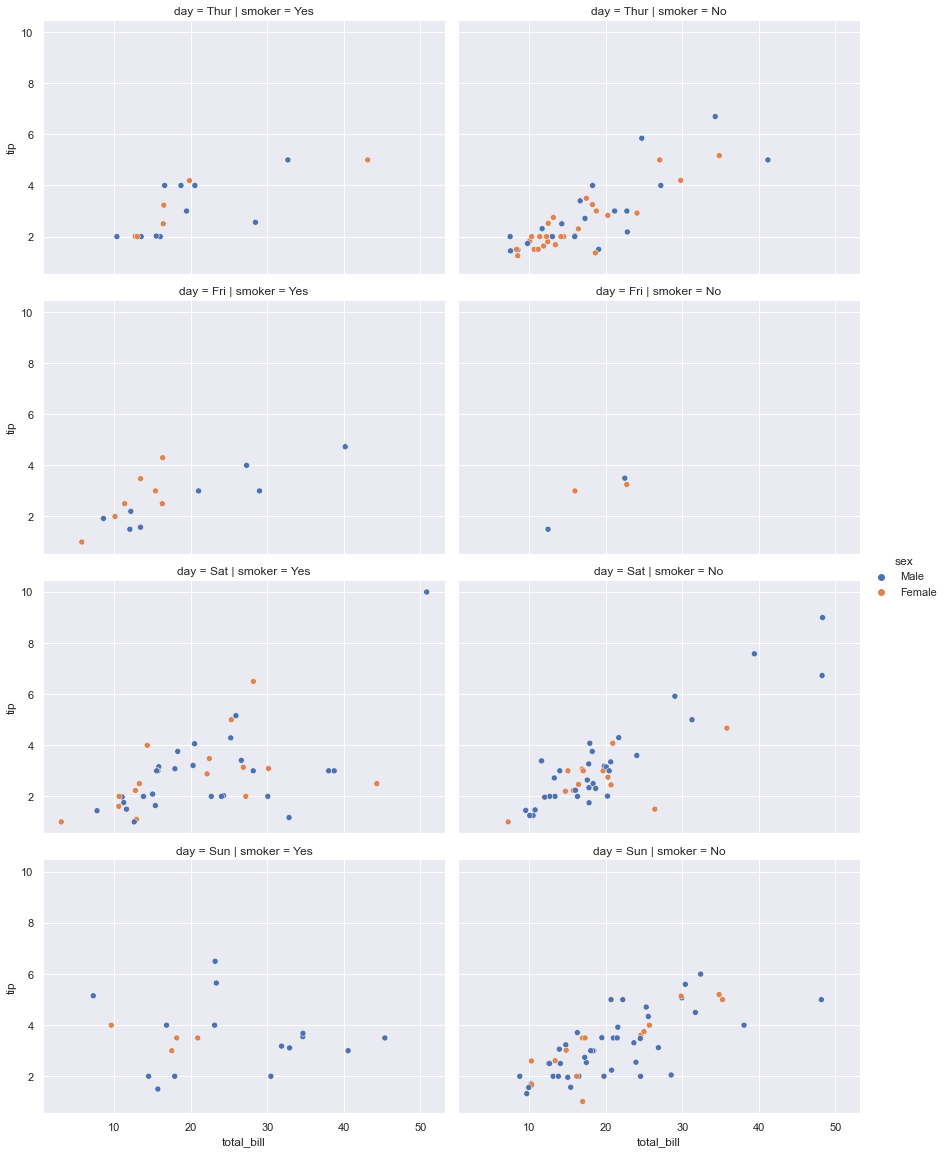

In [150]:
grid = sns.relplot(x='total_bill', y='tip', \
                   row='day', col='smoker', hue='sex', \
                   data=tips, kind='scatter', \
                   height=4, aspect=1.5)

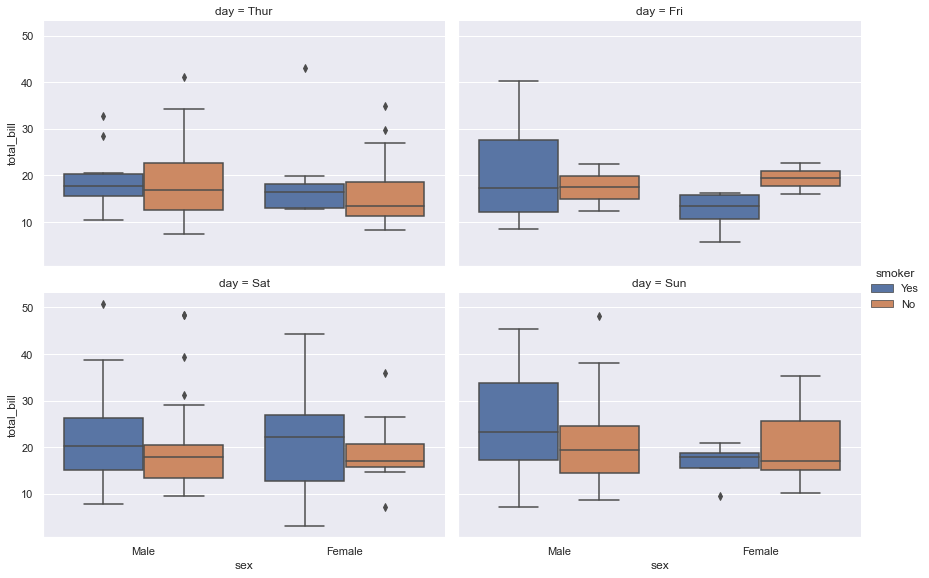

In [151]:

grid = sns.catplot(x = 'sex' , y = 'total_bill', \
               col = 'day', col_wrap=2, hue = 'smoker', \
               data=tips, kind='box', \
              height=4, aspect=1.5 )

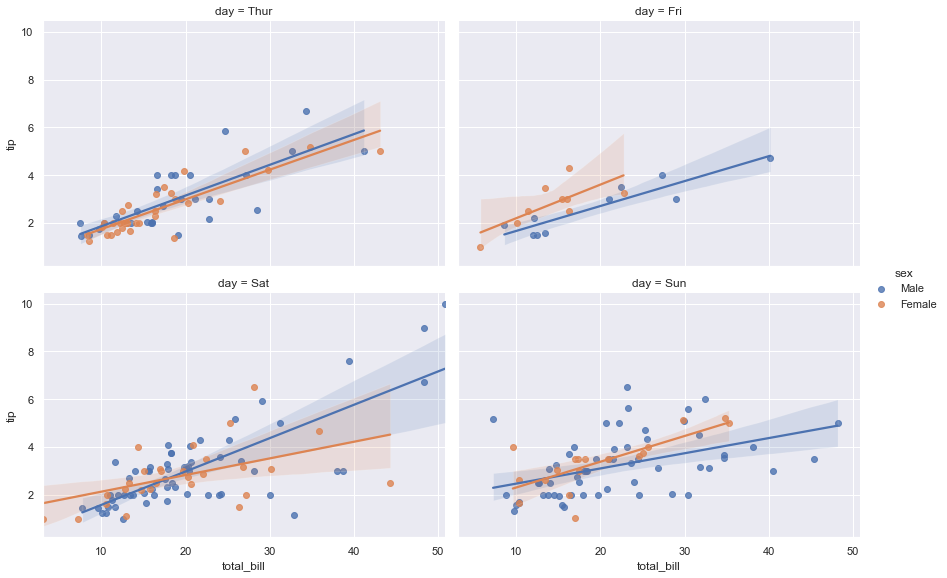

In [152]:
grid = sns.lmplot(x='total_bill', y='tip', \
                 col='day', col_wrap=2, hue = 'sex', \
                 data=tips, \
                 height=4, aspect=1.5)

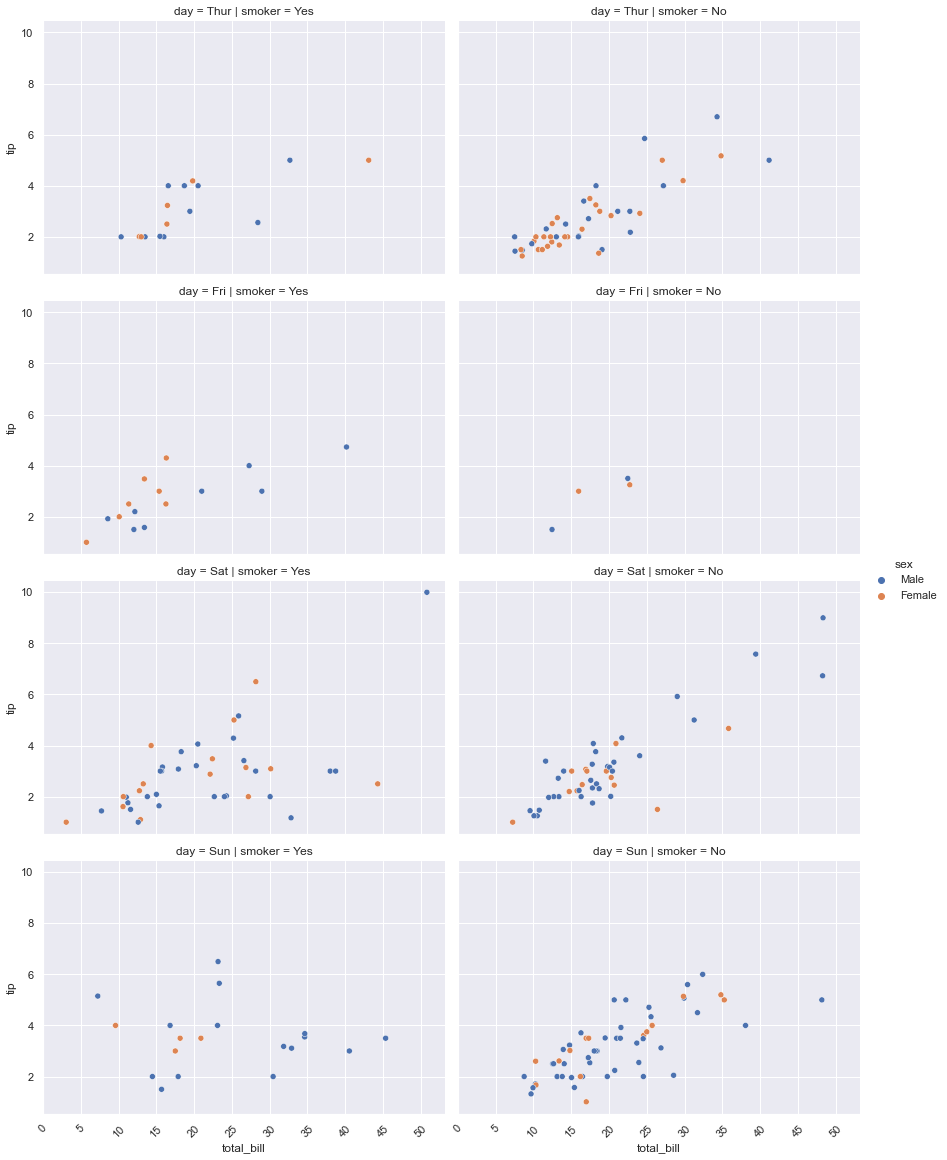

In [153]:
grid =sns.relplot(x='total_bill', y='tip', \
                 row = 'day', col = 'smoker', hue = 'sex', \
                 data=tips, kind = 'scatter', \
                  height = 4, aspect = 1.5
                 )
all_axes = grid.axes
for ax in all_axes.flatten():
    ax.set_xticks(np.arange(0, 55, 5))
    ax.tick_params('x', labelrotation=45)
    

#### PairGrid - manually

In [154]:
iris = sns.load_dataset('iris')

In [155]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


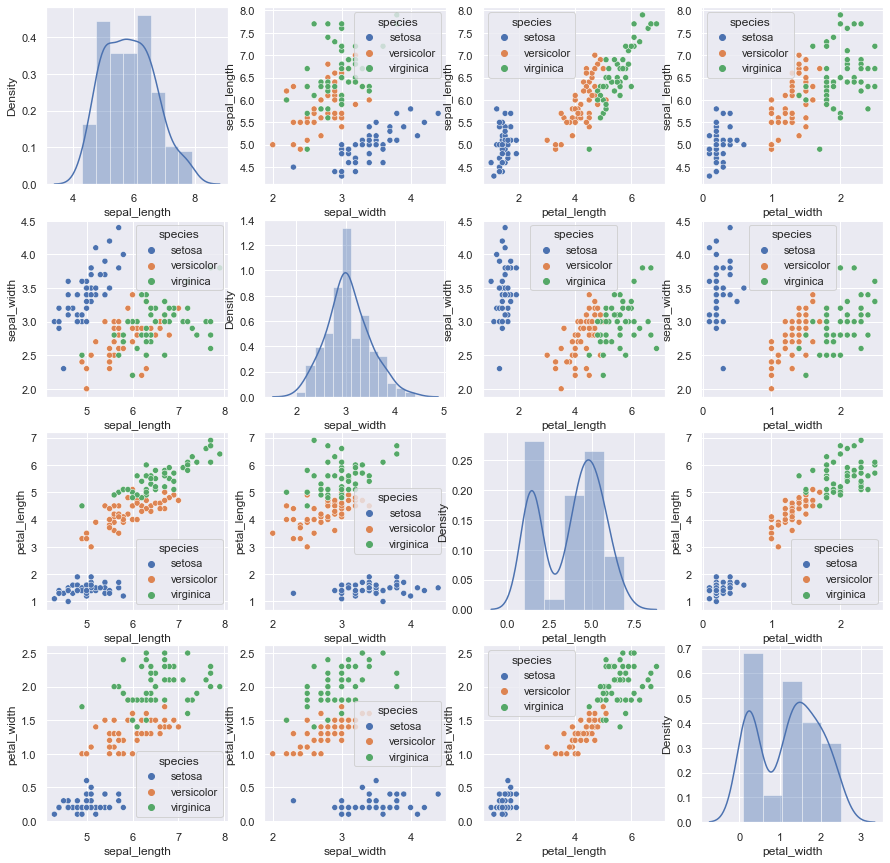

In [156]:
row_variables = iris.columns[:-1]
column_variables = iris.columns[:-1]
num_rows = row_variables.shape[0]
num_columns = column_variables.shape[0]
fig,axes = plt.subplots(num_rows, num_columns, figsize=(15,15))
for i in range(num_rows):
    for j in range(num_columns):
        ax = axes[i][j]
        row_variable = row_variables[i]
        column_variable = column_variables[j]
        if row_variable == column_variable :
            sns.distplot(a=iris[row_variable], ax=ax)
        else:
            sns.scatterplot(x=column_variable, y=row_variable, data=iris, hue='species', ax=ax)

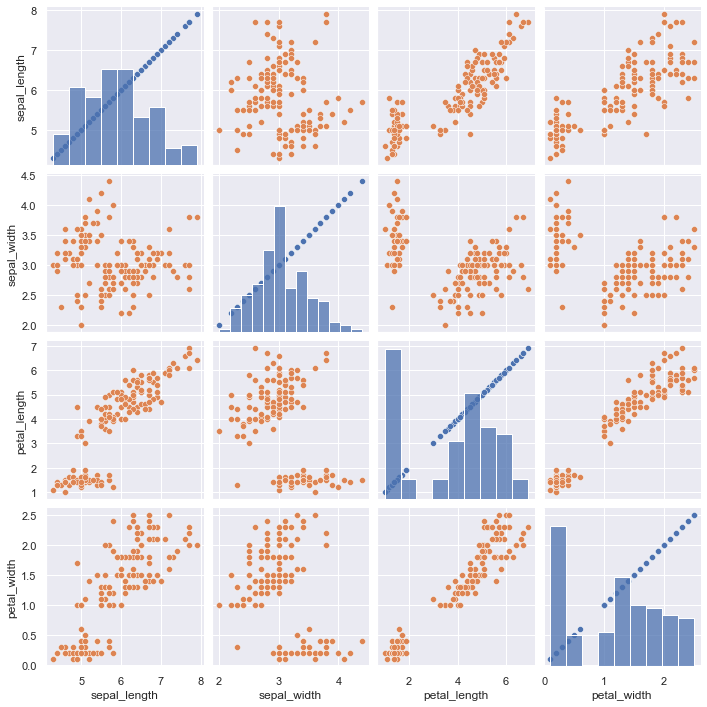

In [157]:
pairplot = sns.pairplot(data=iris)
pairplot.map(sns.scatterplot);

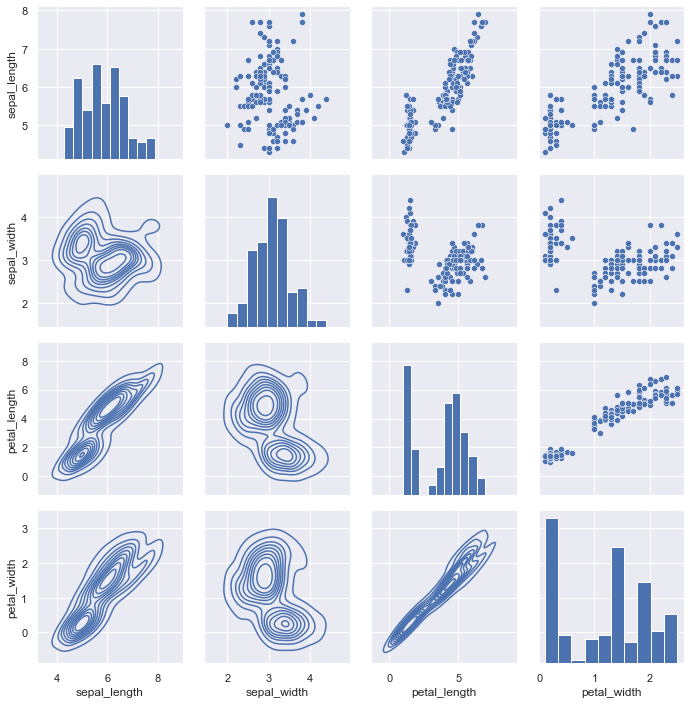

In [158]:
pairgrid = sns.PairGrid(data=iris)
pairgrid = pairgrid.map_upper(sns.scatterplot)
pairgrid = pairgrid.map_diag(plt.hist)
pairgrid = pairgrid.map_lower(sns.kdeplot)

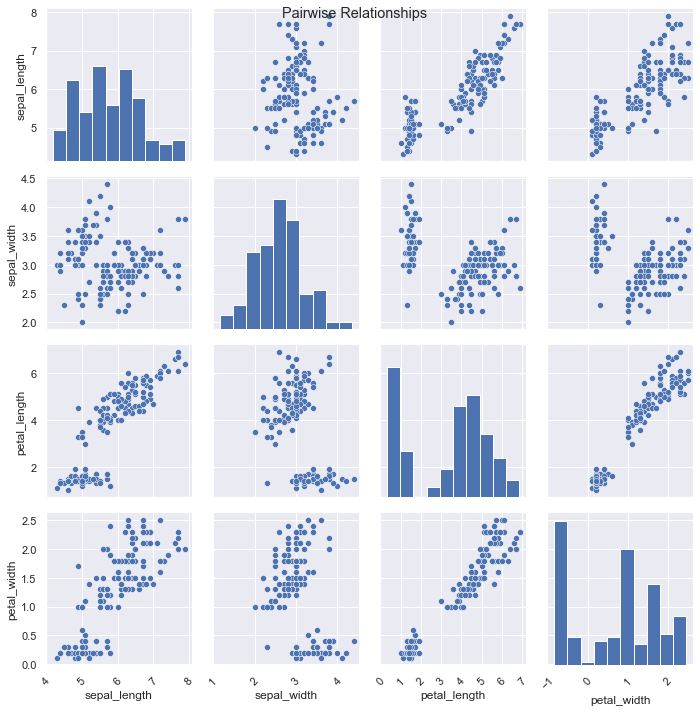

In [159]:
pairgrid = sns.PairGrid(data=iris)
pairgrid = pairgrid.map_offdiag(sns.scatterplot)
pairgrid = pairgrid.map_diag(plt.hist)
all_axes = pairgrid.axes
fig = pairgrid.fig
fig.suptitle('Pairwise Relationships')
for ax in all_axes.flatten():
    xmin, xmax = ax.get_xlim()
    xmin = np.floor(xmin)
    xmax = np.ceil(xmax)
    xticks = np.arange(xmin, xmax, 1)
    ax.set_xticks(xticks)
    ax.tick_params('x', labelrotation=45)

#### JointGrid

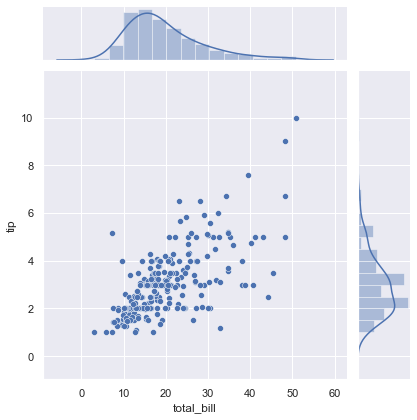

In [160]:
jointgrid = sns.JointGrid(x='total_bill', y='tip', data=tips)
jointgrid.plot_joint(sns.scatterplot)
jointgrid.plot_marginals(sns.distplot);

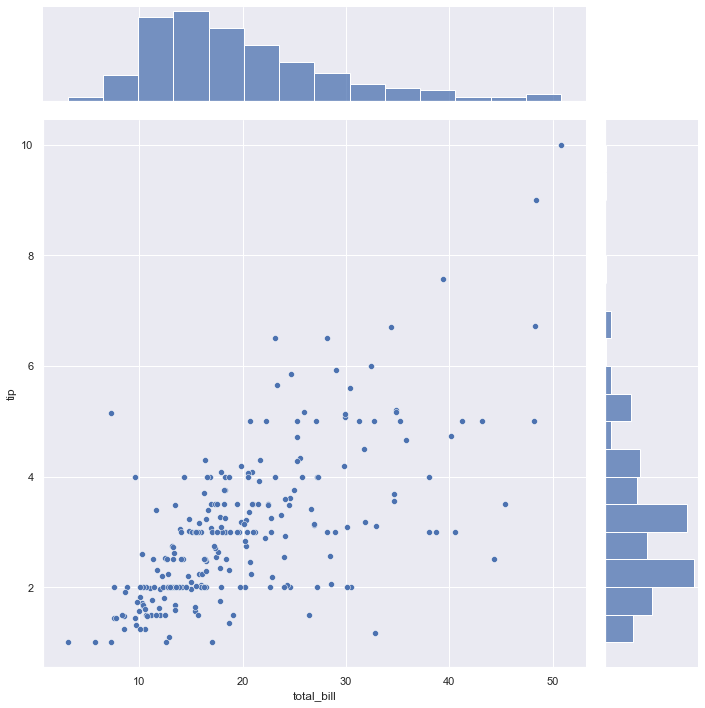

In [161]:
sns.jointplot(x='total_bill', y='tip', data=tips, height=10);

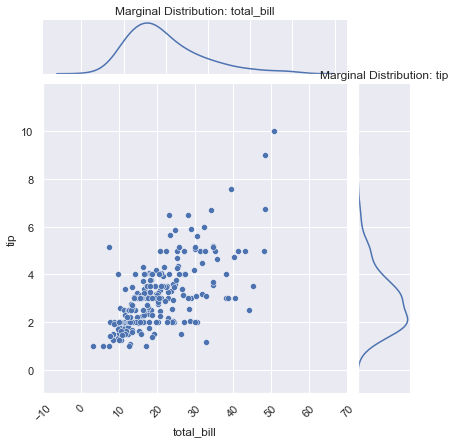

In [162]:
jointgrid = sns.JointGrid(x='total_bill', y='tip', data=tips)
jointgrid.plot_joint(sns.scatterplot)
jointgrid.plot_marginals(sns.kdeplot)
jointgrid.ax_marg_x.set_title('Marginal Distribution: total_bill')
jointgrid.ax_marg_y.set_title('Marginal Distribution: tip')
jointgrid.ax_joint.set_xticks(np.arange(-10,80,10))
jointgrid.ax_joint.tick_params('x', labelrotation=45)